# **Mounting Drive**

In [295]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading Necessary Libraries**

In [296]:
#Loading Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf


from tensorflow import keras
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# **Loading DataSet and Displaying Last 5Rows**

In [297]:
dataset_path = '/content/drive/My Drive/Colab Notebooks/Assignment3/CustomerChurn_dataset.csv'
df = pd.read_csv(dataset_path)


df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Data Cleaning**

In [298]:
df.drop('customerID', axis='columns', inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [299]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [300]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [301]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [302]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [303]:
df.shape

(7043, 20)

In [304]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [305]:
pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [306]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

<ipython-input-306-b67e0c3d31a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [307]:
df1.TotalCharges.dtypes

dtype('float64')

In [308]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


# **Exploratory Data Analysis**

<function matplotlib.pyplot.legend(*args, **kwargs)>

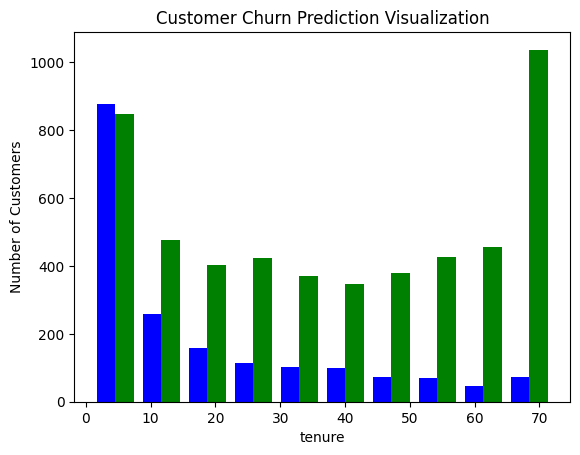

In [309]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_churn_yes, tenure_churn_no], color=['blue','green'], label=['Churn=Yes','Churn=No'])
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

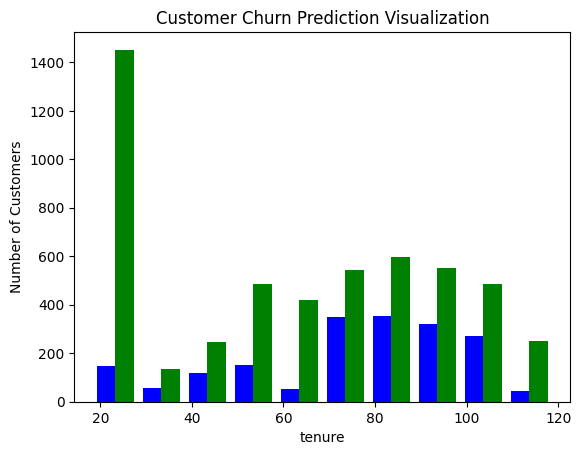

In [310]:
tenure_churn_no = df1[df1.Churn=='No'].MonthlyCharges
tenure_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")


plt.hist([tenure_churn_yes, tenure_churn_no], color=['blue','green'], label=['Churn=Yes','Churn=No'])
plt.legend

In [311]:
def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes=='object':
      print(f'{column} : {df[column].unique()}')

In [312]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [313]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

<ipython-input-313-f205fe68192d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace=True)
<ipython-input-313-f205fe68192d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace=True)


In [314]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [315]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                  'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_columns:
  df1[col].replace({'Yes': 1, 'No': 0}, inplace=True)

<ipython-input-315-c16f248ca75a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1, 'No': 0}, inplace=True)


In [316]:
for col in df1:
  print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [317]:
df1['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)

<ipython-input-317-64ef42fe16d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)


In [318]:
df1['gender'].unique()

array([1, 0])

In [319]:
df2 = pd.get_dummies(data=df1,columns=['InternetService', 'Contract', 'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [320]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [321]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [322]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

# **Feature Importance**

In [323]:
# Initialize a random forest classifier and fit it on the data
rf = RandomForestClassifier()
rf.fit(X, y)

# Get the feature importances from the random forest model
importances = rf.feature_importances_

# Sort the feature importances in descending order
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Select the top 10 features
top_10_features = feature_importances[:10].index

# Store the top 10 features in a variable
best_10_features = list(top_10_features)

print(best_10_features)

['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract_Month-to-month', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check', 'Contract_Two year', 'gender', 'PaperlessBilling', 'Partner']


# **Exploratory Data Analysis**

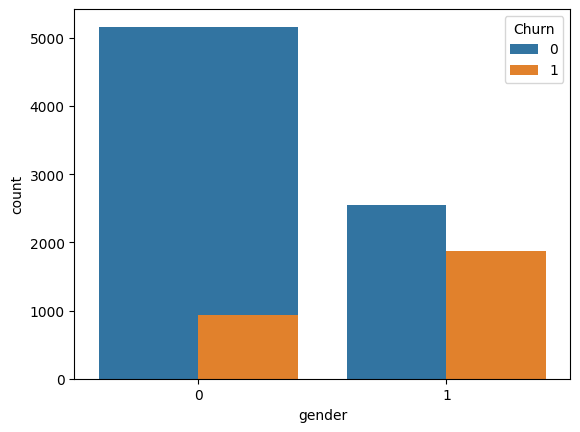

In [324]:
# Explore the relationship between different variables and churn using visualizations
# Plot the count of churned vs. non-churned customers
sns.countplot(x='Churn', data=df2)

# Plot the churn rate by customer gender
sns.countplot(x='gender', hue='Churn', data=df2)
plt.show()

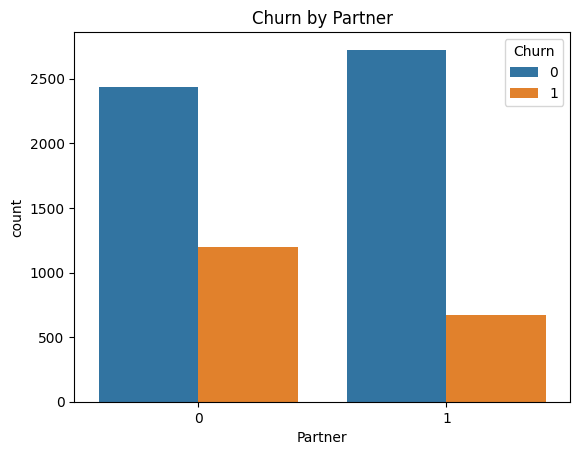

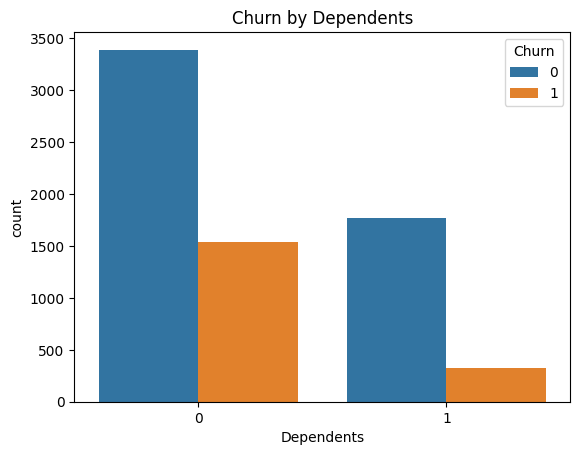

In [325]:
# Plot the churn rate by customer having a partner and dependents
sns.countplot(x='Partner', hue='Churn', data=df2)
plt.title('Churn by Partner')
plt.show()

sns.countplot(x='Dependents', hue='Churn', data=df2)
plt.title('Churn by Dependents')
plt.show()

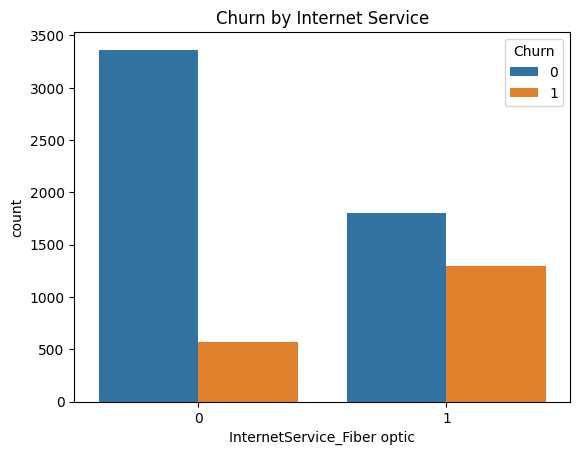

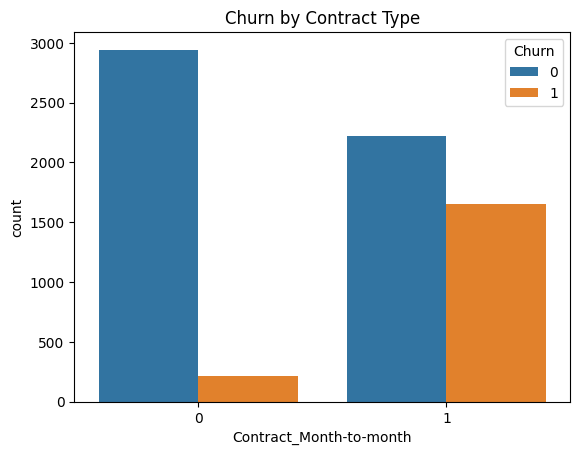

In [326]:

# Plot the churn rate by customer's internet service type
sns.countplot(x='InternetService_Fiber optic', hue='Churn', data=df2)
plt.title('Churn by Internet Service')
plt.show()

# Plot the churn rate by customer's contract type
sns.countplot(x='Contract_Month-to-month', hue='Churn', data=df2)
plt.title('Churn by Contract Type')
plt.show()

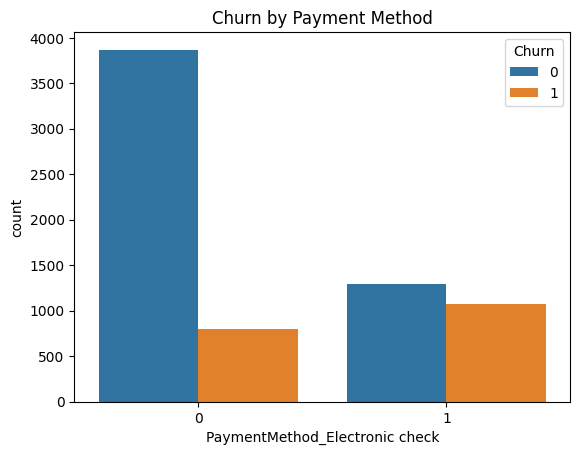

In [327]:
# Plot the churn rate by customer's payment method
sns.countplot(x='PaymentMethod_Electronic check', hue='Churn', data=df2)
plt.title('Churn by Payment Method')
plt.show()

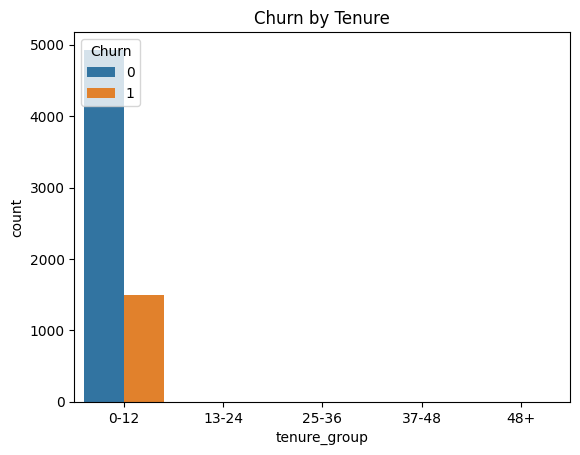

In [328]:
# Plot the churn rate by customer's tenure
df2['tenure_group'] = pd.cut(df2['tenure'], bins=[0, 12, 24, 36, 48, np.inf], labels=['0-12', '13-24', '25-36', '37-48', '48+'])
sns.countplot(x='tenure_group', hue='Churn', data=df2)
plt.title('Churn by Tenure')
plt.show()

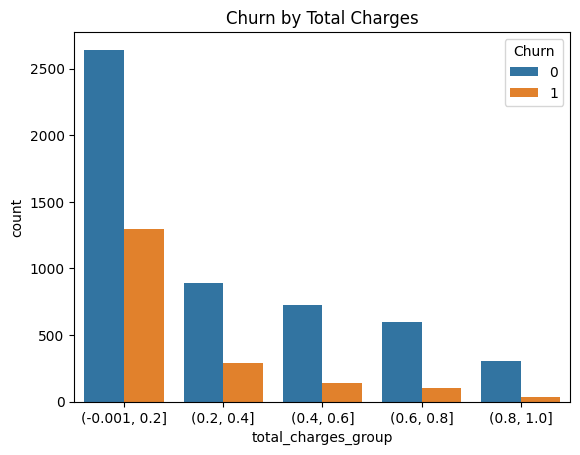

In [329]:
# Plot the churn rate by customer's total charges
df2['total_charges_group'] = pd.cut(df2['TotalCharges'], bins=5)
sns.countplot(x='total_charges_group', hue='Churn', data=df2)
plt.title('Churn by Total Charges')
plt.show()

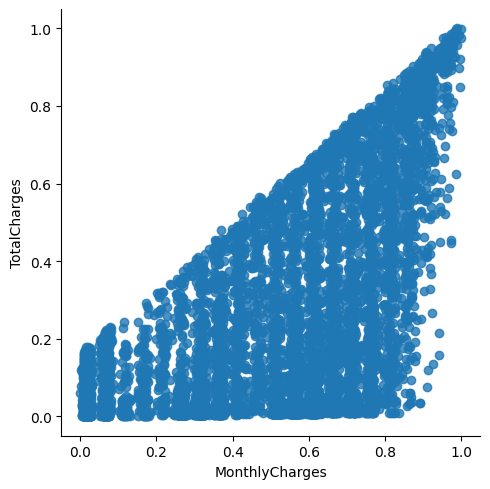

In [330]:
sns.lmplot(data=df2, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

<ipython-input-331-1c311f0544a6>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df2.MonthlyCharges[(df2["Churn"] == 0) ],
<ipython-input-331-1c311f0544a6>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df2.MonthlyCharges[(df2["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly Charges by Churn')

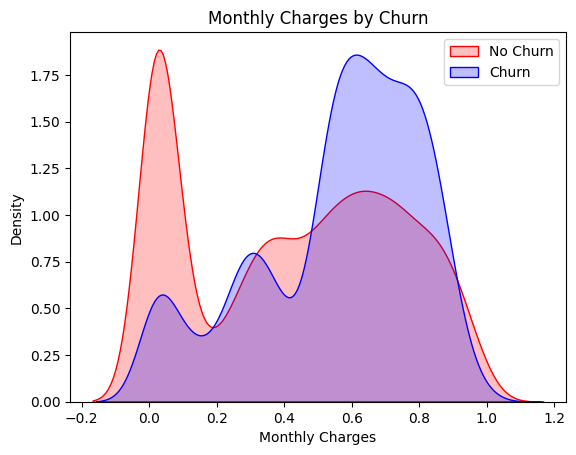

In [331]:
Mth = sns.kdeplot(df2.MonthlyCharges[(df2["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df2.MonthlyCharges[(df2["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly Charges by Churn')

# **Model Training and Optimization**

In [332]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [333]:
# Select the top 10 features
top_10_features = feature_importances[:10].index

# Subset the data with the top 10 features
X_top_10 = X[top_10_features]

# Define the input shape
input_shape = X_top_10.shape[1]

# Define the model architecture using the functional API
inputs = keras.Input(shape=(input_shape,))

# For example, if you are using Dense layers:
x = keras.layers.Dense(20, activation='relu')(inputs)
x = keras.layers.Dense(64, activation='relu')(x)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model with custom optimizer and learning rate
optimizer = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_top_10, y, epochs=1000, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/1000
157/176 [=========================>....] - ETA: 0s - loss: 0.4885 - accuracy: 0.7691

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
176/176 [==============================] - 2s 4ms/step - loss: 0.4847 - accuracy: 0.7705 - val_loss: 0.4482 - val_accuracy: 0.7811
Epoch 2/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.4372 - accuracy: 0.7950 - val_loss: 0.4573 - val_accuracy: 0.7775
Epoch 3/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.4336 - accuracy: 0.7950 - val_loss: 0.4450 - val_accuracy: 0.7861
Epoch 4/1000
176/176 [==============================] - 1s 4ms/step - loss: 0.4307 - accuracy: 0.7980 - val_loss: 0.4484 - val_accuracy: 0.7925
Epoch 5/1000
176/176 [==============================] - 1s 4ms/step - loss: 0.4302 - accuracy:

In [334]:
model.evaluate(X_top_10, y)

220/220 [==============================] - 1s 3ms/step - loss: 0.4107 - accuracy: 0.8032


[0.4107125401496887, 0.8031854629516602]

In [335]:
y_p = model.predict(X_top_10)
y_p[:5]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
220/220 [==============================] - 1s 3ms/step


array([[0.5915565 ],
       [0.06931335],
       [0.4731393 ],
       [0.0447132 ],
       [0.79694587]], dtype=float32)

In [336]:
y[:5]

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [337]:
y_pred = []
for element in y_p:
  if element>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [338]:
y_pred[:5]

[1, 0, 0, 0, 1]

In [339]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      5163
           1       0.65      0.55      0.60      1869

    accuracy                           0.80      7032
   macro avg       0.75      0.72      0.73      7032
weighted avg       0.80      0.80      0.80      7032



In [340]:
# Evaluating the model
accuracy = accuracy_score(y, y_pred)
auc_score = roc_auc_score(y, y_pred)
print(f"Accuracy: {accuracy}")
print(f"AUC Score: {auc_score}")

Accuracy: 0.8031854379977247
AUC Score: 0.7222569903334288


In [341]:
model_score = model.evaluate(X_top_10, y)
print("Model Score:", model_score)

220/220 [==============================] - 1s 3ms/step - loss: 0.4107 - accuracy: 0.8032
Model Score: [0.4107125401496887, 0.8031854629516602]


# **Saving Model**

In [342]:
# Define the path to save the model
model_path = '/content/drive/My Drive/Colab Notebooks/AI_Assignment3/my_model.h5'

# Save the model
model.save(model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  `tf.saved_model.SaveOptions` object that specifies SavedModel
